In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
M_sol  = 1.9891e30 #[M_sol] = Kg
R_sol  = 6.95508e8 #[R_sol] = m
G      = 6.673e-11 # [G] = N m^2 Kg^-2
E_nuc  = 3.839e26 #[E_nuc] = kg m^2 / s^2

ro_sol = 0.75 * M_sol/(np.pi * R_sol**3)

#----------------- Condiciones en el centro------------------------
Pc = 2.3e16 #[Pc] = N / m^2
Tc = 1.56e7 #[K]


In [17]:
M = M_sol*frange(0, 1.,0.02)
n = len(M)

print M

[0.000000e+00 3.978200e+28 7.956400e+28 1.193460e+29 1.591280e+29
 1.989100e+29 2.386920e+29 2.784740e+29 3.182560e+29 3.580380e+29
 3.978200e+29 4.376020e+29 4.773840e+29 5.171660e+29 5.569480e+29
 5.967300e+29 6.365120e+29 6.762940e+29 7.160760e+29 7.558580e+29
 7.956400e+29 8.354220e+29 8.752040e+29 9.149860e+29 9.547680e+29
 9.945500e+29 1.034332e+30 1.074114e+30 1.113896e+30 1.153678e+30
 1.193460e+30 1.233242e+30 1.273024e+30 1.312806e+30 1.352588e+30
 1.392370e+30 1.432152e+30 1.471934e+30 1.511716e+30 1.551498e+30
 1.591280e+30 1.631062e+30 1.670844e+30 1.710626e+30 1.750408e+30
 1.790190e+30 1.829972e+30 1.869754e+30 1.909536e+30 1.949318e+30
 1.989100e+30]


In [18]:
r_3 = np.zeros(n)

for i in np.arange(n-1):
    r_3[i+1] = r_3[i] + 0.75*(M[i+1]-M[i])/(ro_sol*np.pi)
    

r = r_3**(1/3.)
print r_3

[0.00000000e+00 6.72878087e+24 1.34575617e+25 2.01863426e+25
 2.69151235e+25 3.36439043e+25 4.03726852e+25 4.71014661e+25
 5.38302469e+25 6.05590278e+25 6.72878087e+25 7.40165895e+25
 8.07453704e+25 8.74741513e+25 9.42029321e+25 1.00931713e+26
 1.07660494e+26 1.14389275e+26 1.21118056e+26 1.27846836e+26
 1.34575617e+26 1.41304398e+26 1.48033179e+26 1.54761960e+26
 1.61490741e+26 1.68219522e+26 1.74948303e+26 1.81677083e+26
 1.88405864e+26 1.95134645e+26 2.01863426e+26 2.08592207e+26
 2.15320988e+26 2.22049769e+26 2.28778549e+26 2.35507330e+26
 2.42236111e+26 2.48964892e+26 2.55693673e+26 2.62422454e+26
 2.69151235e+26 2.75880016e+26 2.82608796e+26 2.89337577e+26
 2.96066358e+26 3.02795139e+26 3.09523920e+26 3.16252701e+26
 3.22981482e+26 3.29710262e+26 3.36439043e+26]


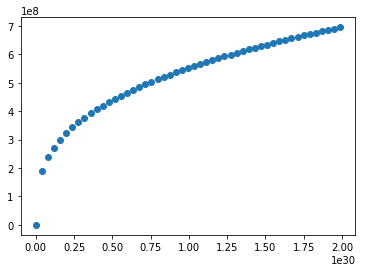

In [19]:
plt.plot(M,r,'o')

In [20]:
L = np.zeros(n)

for i in np.arange(n-1):
    L[i+1] = L[i] + E_nuc*(M[i+1]-M[i])

print L

[0.00000000e+00 1.52723098e+55 3.05446196e+55 4.58169294e+55
 6.10892392e+55 7.63615490e+55 9.16338588e+55 1.06906169e+56
 1.22178478e+56 1.37450788e+56 1.52723098e+56 1.67995408e+56
 1.83267718e+56 1.98540027e+56 2.13812337e+56 2.29084647e+56
 2.44356957e+56 2.59629267e+56 2.74901576e+56 2.90173886e+56
 3.05446196e+56 3.20718506e+56 3.35990816e+56 3.51263125e+56
 3.66535435e+56 3.81807745e+56 3.97080055e+56 4.12352365e+56
 4.27624674e+56 4.42896984e+56 4.58169294e+56 4.73441604e+56
 4.88713914e+56 5.03986223e+56 5.19258533e+56 5.34530843e+56
 5.49803153e+56 5.65075463e+56 5.80347772e+56 5.95620082e+56
 6.10892392e+56 6.26164702e+56 6.41437012e+56 6.56709321e+56
 6.71981631e+56 6.87253941e+56 7.02526251e+56 7.17798561e+56
 7.33070870e+56 7.48343180e+56 7.63615490e+56]


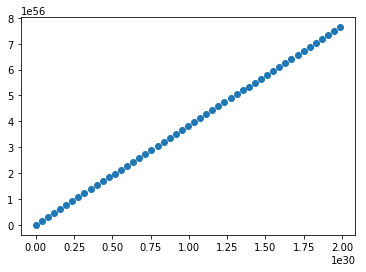

In [21]:
plt.plot(M,L,'o')

In [22]:
P = np.zeros(n)

P[0] =  Pc
P[1] = P[0]

aux1 = G / (4. * np.pi)

for i in np.arange(2,n-1):
    aux2 = 0.5*(M[i+1] - 2*M[i] + M[i-1])
    
    P[i] = P[i-1] - (aux1 * aux2 * M[i-1] / (r[i-1]**4))

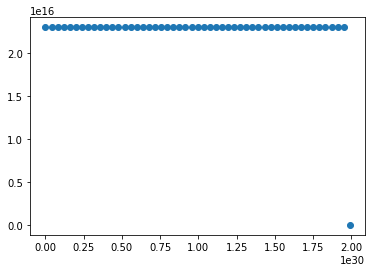

In [23]:
plt.plot(M,P,'o')

In [24]:
P = np.zeros(n)

P[0] =  2.3e16 #[Presion en el centro del sol] = N / m^2
P[1] = P[0]

aux = G / (2. * np.pi)

for i in np.arange(2,n):
    
    #aux1 = (M[i+1]-M[i])*0.5
    #aux2 = (M[i]-M[i-1])*0.5
    
    P[i] = P[i-1] - (aux * M[i-1]**2 /(r[i-1]**4))    

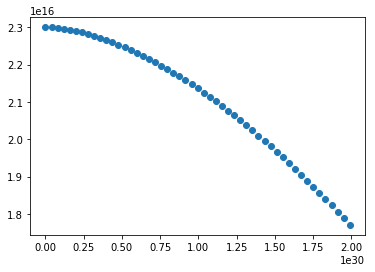

In [25]:
plt.plot(M,P,'o')

In [26]:
T = np.zeros(n)
T[0] = 15e6
T[1] = T[0]
aux = 1.

for i in np.arange(2,n):
    
    #T[i] = T[i-1] - aux * M[i-1]**2 * 0.5 * (B[i] + B[i-1]) / r[i-1]**4 ------> OPCION 1
    T[i] = T[i-1] - aux * L[i-1] * M[i-1] / (T[i-1]**3 * r[i-1]**4)

#print T

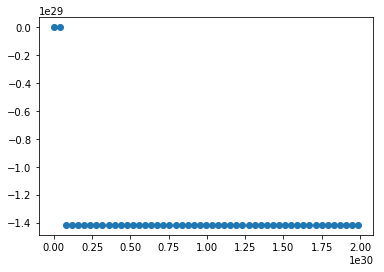

In [27]:
plt.plot(M,T,'o')